Let’s compare two different measures of distance in a vector space, and why either has its function under different circumstances. Starting off with quite a straight-forward example, we have our vector space X, that contains instances with animals. They are measured by their length, and weight. They have also been labelled by their stage of aging (young = 0, mid = 1, adult = 2). Here’s some random data:

In [1]:
import numpy as np

X = np.array([[6.6, 6.2, 1],
              [9.7, 9.9, 2],
              [8.0, 8.3, 2],
              [6.3, 5.4, 1],
              [1.3, 2.7, 0],
              [2.3, 3.1, 0],
              [6.6, 6.0, 1],
              [6.5, 6.4, 1],
              [6.3, 5.8, 1],
              [9.5, 9.9, 2],
              [8.9, 8.9, 2],
              [8.7, 9.5, 2],
              [2.5, 3.8, 0],
              [2.0, 3.1, 0],
              [1.3, 1.3, 0]])

In [2]:
import pandas as pd

df = pd.DataFrame(X, columns=['weight', 'length', 'label'])
df

,weight,length,label
0,6.6,6.2,1.0
1,9.7,9.9,2.0
2,8.0,8.3,2.0
3,6.3,5.4,1.0
4,1.3,2.7,0.0
5,2.3,3.1,0.0
6,6.6,6.0,1.0
7,6.5,6.4,1.0
8,6.3,5.8,1.0
9,9.5,9.9,2.0


Now the data can be plotted to visualize the three different groups. They are subsetted by their label, ### assigned a different colour and label, and by repeating this they form different layers in the scatter plot.

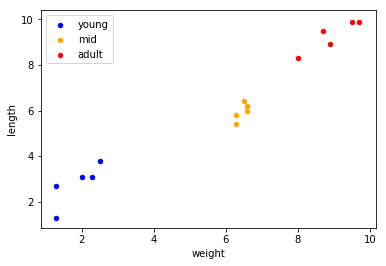

In [3]:
%matplotlib inline

ax = df[df['label'] == 0].plot.scatter(x='weight', y='length', c='blue', label='young')
ax = df[df['label'] == 1].plot.scatter(x='weight', y='length', c='orange', label='mid', ax=ax)
ax = df[df['label'] == 2].plot.scatter(x='weight', y='length', c='red', label='adult', ax=ax)
ax

Looking at the plot above, we can see that the three classes are pretty well distinguishable by these two features that we have. Say that we apply k-NN to our data that will learn to classify new instances based on their distance to our known instances (and their labels). The algorithm needs a distance metric to determine which of the known instances are closest to the new one. Let’s try to choose between either euclidean or cosine for this example.

Picking our Metric
Considering instance 0, 1, and 4 to be our known instances, we assume that we don’t know the label of 14.
Plotting this will look as follows:

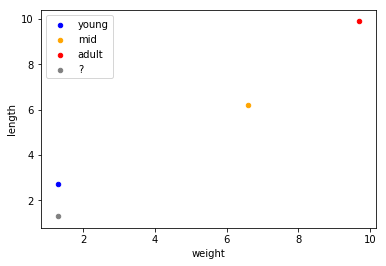

In [4]:
df2 = pd.DataFrame([df.iloc[0], df.iloc[1], df.iloc[4]], columns=['weight', 'length', 'label'])
df3 = pd.DataFrame([df.iloc[14]], columns=['weight', 'length', 'label'])

ax = df2[df2['label'] == 0].plot.scatter(x='weight', y='length', c='blue', label='young')
ax = df2[df2['label'] == 1].plot.scatter(x='weight', y='length', c='orange', label='mid', ax=ax)
ax = df2[df2['label'] == 2].plot.scatter(x='weight', y='length', c='red', label='adult', ax=ax)
ax = df3.plot.scatter(x='weight', y='length', c='gray', label='?', ax=ax)
ax

### Euclidean

##### Our euclidean distance function can be defined as follows:
    
![](https://github.com/rakash/images/blob/master/euc.png?raw=true)    

Where x and y are two vectors

In [13]:
def euclidean_distance(x, y):   
    return np.sqrt(np.sum((x - y) ** 2))

In [5]:
### Lets see this for all our vectors:

x0 = X[0][:-1]
x1 = X[1][:-1]
x4 = X[4][:-1]
x14 = X[14][:-1]
print(" x0:", x0, "\n x1:", x1, "\n x4:", x4, "\nx14:", x14)

 x0: [6.6 6.2] 
 x1: [9.7 9.9] 
 x4: [1.3 2.7] 
x14: [1.3 1.3]


In [14]:
# Doing the calculations:

print(" x14 and x0:", euclidean_distance(x14, x0), "\n",
      "x14 and x1:", euclidean_distance(x14, x1), "\n",
      "x14 and x4:", euclidean_distance(x14, x4))

 x14 and x0: 7.218032973047436 
 x14 and x1: 12.021647141718974 
 x14 and x4: 1.4000000000000001


In [16]:
# According to euclidean distance, instance 14 is closest to 4. Our 4th instance had the label:
    
X[4]

array([1.3, 2.7, 0. ])

In [ ]:
0 = young, which is what we would visually also deem the correct label for this instance.

Now let’s see what happens when we use Cosine similarity.

### Cosine

##### Our cosine similarity function can be defined as follows:


![](https://github.com/rakash/images/blob/master/cos.png?raw=true)

Where x and y are two vectors. Or:

In [17]:
def cosine_similarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

In [18]:
print(" x14 and x0:", cosine_similarity(x14, x0), "\n",
      "x14 and x1:", cosine_similarity(x14, x1), "\n",
      "x14 and x4:", cosine_similarity(x14, x4))

 x14 and x0: 0.9995120760870786 
 x14 and x1: 0.9999479424242859 
 x14 and x4: 0.9438583563660174


In [19]:
# According to cosine similarity, instance 14 is closest to 1. However, our 1st instance had the label:

X[1]

array([9.7, 9.9, 2. ])

In [ ]:
2 = adult, which is definitely NOT what we would deem the correct label!

## So What Happened?


Consider the Picture below:


![](https://github.com/rakash/images/blob/master/graph.png?raw=true)

This is a visual representation of euclidean distance (d) and cosine similarity (θ). While cosine looks at the angle between vectors (thus not taking into regard their weight or magnitude), euclidean distance is similar to using a ruler to actually measure the distance. In our example the angle between x14 and x4 was larger than those of the other vectors, even though they were further away.

#### When to Use Cosine?


Cosine similarity is generally used as a metric for measuring distance when the magnitude of the vectors does not matter. This happens for example when working with text data represented by word counts. We could assume that when a word (e.g. science) occurs more frequent in document 1 than it does in document 2, that document 1 is more related to the topic of science. However, it could also be the case that we are working with documents of uneven lengths (Wikipedia articles for example). Then, science probably occurred more in document 1 just because it was way longer than document 2. Cosine similarity corrects for this.

Text data is the most typical example for when to use this metric. However, you might also want to apply cosine similarity for other cases where some properties of the instances make so that the weights might be larger without meaning anything different. Sensor values that were captured in various lengths (in time) between instances could be such an example.

### How do Euclidean Distance and Cosine Similarity Relate?

Let’s consider two of our vectors, their euclidean distance, as well as their cosine similarity.

In [20]:
print("vectors \t", x0, x1, "\n"
      "euclidean \t", euclidean_distance(x0, x1), "\n"
      "cosine \t\t", cosine_similarity(x0, x1))

vectors 	 [6.6 6.2] [9.7 9.9] 
euclidean 	 4.827007354458868 
cosine 		 0.9991413385403556


Cosine similarity takes a unit length vector to calculate dot products. However, what happens if we do the same for the vectors we’re calculating the euclidian distance for (i.e. normalize them)? For this, we can for example use the L1 norm:

In [21]:
def l1_normalize(v):
    norm = np.sum(v)
    return v / norm

def l2_normalize(v):
    norm = np.sqrt(np.sum(np.square(v)))
    return v / norm

In [23]:
# We divide the values of our vector by these norms to get a normalized vector.

# Applying the L1 norm to our vectors will make them sum up to 1 respectively, as such:

x0_n = l1_normalize(x0)
x1_n = l1_normalize(x1)
print(x0_n, x1_n)

[0.515625 0.484375] [0.49489796 0.50510204]


In [24]:
# Let’s compare the result we had before against these normalized vectors:

print("vectors \t", x0_n, x1_n, "\n"
      "euclidean \t", euclidean_distance(x0_n, x1_n), "\n"
      "cosine \t\t", cosine_similarity(x0_n, x1_n))

vectors 	 [0.515625 0.484375] [0.49489796 0.50510204] 
euclidean 	 0.029312462230309616 
cosine 		 0.9991413385403558


As we can see, before, the distance was pretty big, but the cosine similarity very high.
Now that we normalized our vectors, it turns out that the distance is now very small. 
The same pattern occurs when we compare it against vector 4. 

Unnormalized:

In [25]:
print("vectors \t", x0, x4, "\n"
      "euclidean \t", euclidean_distance(x0, x4), "\n"
      "cosine \t\t", cosine_similarity(x0, x4))

vectors 	 [6.6 6.2] [1.3 2.7] 
euclidean 	 6.351377803280167 
cosine 		 0.9330794115892785


In [27]:
# Normalized:

x4_n = l1_normalize(x4)

print("vectors \t", x0_n, x4_n, "\n"
      "euclidean \t", euclidean_distance(x0_n, x4_n), "\n"
      "cosine \t\t", cosine_similarity(x0_n, x4_n))

vectors 	 [0.515625 0.484375] [0.325 0.675] 
euclidean 	 0.26958446032737116 
cosine 		 0.9330794115892785


Notice that because the cosine similarity is a bit lower between x0 and x4 than it was for x0 and x1, the euclidean distance is now also a bit larger. To take this point home, let’s construct a vector that is almost evenly distant in our euclidean space, but where the cosine similarity is much lower (because the angle is larger):

In [28]:
x00 = np.array([0.1, 6])

print("vectors \t", x0, x00, "\n"
      "euclidean \t", euclidean_distance(x0, x00), "\n"
      "cosine \t\t", cosine_similarity(x0, x00))


vectors 	 [6.6 6.2] [0.1 6. ] 
euclidean 	 6.503076195155644 
cosine 		 0.696726168727881


In [29]:
# If we normalize this, we should see the same behaviour from our euclidean distance (i.e. it should be larger than for x0 and x4). As follows:

x00_n = l1_normalize(x00)

print("vectors \t", x0_n, x00_n, "\n"
      "euclidean \t", euclidean_distance(x0_n, x00_n), "\n"
      "cosine \t\t", cosine_similarity(x0_n, x00_n))

vectors 	 [0.515625 0.484375] [0.01639344 0.98360656] 
euclidean 	 0.7060200392072649 
cosine 		 0.6967261687278811


In [32]:
### Cosine in Action

##So when is cosine handy? Let’s consider four articles from Wikipedia. We use the Wikipedia API to extract them, after which we can access their text with the .content method.

import wikipedia

q1 = wikipedia.page('Machine Learning')
q2 = wikipedia.page('Artifical Intelligence')
q3 = wikipedia.page('Soccer')
q4 = wikipedia.page('Tennis')

We represent these by their frequency vectors. Each instance is a document, and each word will be a feature. The feature values will then represent how many times a word occurs in a certain document. So the feature ball, will probably be 0 for both machine learning and AI, but definitely not 0 for soccer and tennis. For this example I’ll use sklearn:

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = np.array(cv.fit_transform([q1.content, q2.content, q3.content, q4.content]).todense())

The CountVectorizer by default splits up the text into words using white spaces. We can do the same to see how many words are in each article. Like this:

In [34]:
print("ML \t", len(q1.content.split()), "\n"
      "AI \t", len(q2.content.split()), "\n"
      "soccer \t", len(q3.content.split()), "\n"
      "tennis \t", len(q4.content.split()))

ML 	 6275 
AI 	 15138 
soccer 	 6839 
tennis 	 11096


AI is a much larger article than Machine Learning (ML). This would mean that if we do not normalize our vectors, AI will be much further away from ML just because it has many more words. ML will probably be closer to an article with less words. Let’s try it out:

In [35]:
print("ML - AI \t", euclidean_distance(X[0], X[1]), "\n"
      "ML - soccer \t", euclidean_distance(X[0], X[2]), "\n"
      "ML - tennis \t", euclidean_distance(X[0], X[3]))

ML - AI 	 832.8229103476921 
ML - soccer 	 466.1909480030688 
ML - tennis 	 808.588894309092


Here we can see pretty clearly that our prior assumptions have been confirmed. ML seems to be closest to soccer, which doesn’t make a lot of sense intuitively. So, what happens if we look at cosine similairty (thus normalising our vectors)?

In [36]:
print("ML - AI \t", cosine_similarity(X[0], X[1]), "\n"
      "ML - soccer \t", cosine_similarity(X[0], X[2]), "\n"
      "ML - tennis \t", cosine_similarity(X[0], X[3]))

ML - AI 	 0.8979864796829826 
ML - soccer 	 0.7932601678625442 
ML - tennis 	 0.806543375496949


ML is closer to AI! Granted, it still seems pretty close to soccer an tennis judging from these scores, but please note that word frequency is not that great of a representation for texts with such rich content.

In [37]:
# Categorize a Tweet
# Now, just for fun, let’s see how this plays out for the following tweet by OpenAI:

ml_tweet = "New research release: overcoming many of Reinforcement Learning's limitations with Evolution Strategies."
x = np.array(cv.transform([ml_tweet]).todense())[0]

In [38]:
# Again we represent this tweet as a word vector, and we try to measure the distance between the tweet and our four wikipedia documents:

print("tweet - ML \t", euclidean_distance(x[0], X[0]), "\n"
      "tweet - AI \t", euclidean_distance(x[0], X[1]), "\n"
      "tweet - soccer \t", euclidean_distance(x[0], X[2]), "\n"
      "tweet - tennis \t", euclidean_distance(x[0], X[3]))

tweet - ML 	 568.9226660979505 
tweet - AI 	 1305.1923229930521 
tweet - soccer 	 763.2909012951746 
tweet - tennis 	 1194.18130951711


Well, that worked out pretty well at first glance, it’s closest to ML. However, see how it’s also closer to soccer than AI? There’s so many dimensions that come into play here that it’s hard to say why this is the case. However, soccer being our second smallest document might have something to do with it. Now we’ll do the same for cosine:

In [39]:
print("tweet - ML \t", cosine_similarity(x, X[0]), "\n"
      "tweet - AI \t", cosine_similarity(x, X[1]), "\n"
      "tweet - soccer \t", cosine_similarity(x, X[2]), "\n"
      "tweet - tennis \t", cosine_similarity(x, X[3]))

tweet - ML 	 0.2473470723932541 
tweet - AI 	 0.19261611454078742 
tweet - soccer 	 0.11807413551225644 
tweet - tennis 	 0.11413188773518007


There we go! This seems definitely more in line with our intuitions. So, remember how euclidean distance in this example seemed to slightly relate to the length of the document? Let’s try the same for a soccer tweet, by Manchester United:

In [40]:
so_tweet = "#LegendsDownUnder The Reds are out for the warm up at the @nibStadium. Not long now until kick-off in Perth."
x2 = np.array(cv.transform([so_tweet]).todense())[0]


#Same trick, different tweet:

In [41]:
print("tweet - ML \t", euclidean_distance(x2, X[0]), "\n"
      "tweet - AI \t", euclidean_distance(x2, X[1]), "\n"
      "tweet - soccer \t", euclidean_distance(x2, X[2]), "\n"
      "tweet - tennis \t", euclidean_distance(x2, X[3]))

tweet - ML 	 566.82184149872 
tweet - AI 	 1303.0260933688166 
tweet - soccer 	 760.4110730387873 
tweet - tennis 	 1191.3861674536934


See how awfully similar these distances are to that of our previous tweet, even though there’s very little overlap? Now let’s try the same with cosine similarity:

In [42]:
print("tweet - ML \t", cosine_similarity(x2, X[0]), "\n"
      "tweet - AI \t", cosine_similarity(x2, X[1]), "\n"
      "tweet - soccer \t", cosine_similarity(x2, X[2]), "\n"
      "tweet - tennis \t", cosine_similarity(x2, X[3]))

tweet - ML 	 0.4511925394935143 
tweet - AI 	 0.4632552773509761 
tweet - soccer 	 0.6158956942450493 
tweet - tennis 	 0.5971927298861303


Nailed it!

Hopefully this, by example, proves why for text data normalizing your vectors can make all the difference!